In [ ]:
!apt-get install python3-matplotlib

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-lyx javascript-common libjs-jquery libjs-jquery-ui
  python-matplotlib-data python3-cycler python3-dateutil python3-numpy
  python3-olefile python3-pil python3-pyparsing python3-six python3-tz
  ttf-bitstream-vera
Suggested packages:
  apache2 | lighttpd | httpd libjs-jquery-ui-docs python-cycler-doc dvipng
  gir1.2-gtk-3.0 ghostscript inkscape ipython3 python-matplotlib-doc
  python3-cairocffi python3-gi-cairo python3-gobject python3-nose
  python3-pyqt4 python3-scipy python3-sip python3-tornado texlive-extra-utils
  texlive-latex-extra ttf-staypuft python-numpy-doc python3-numpy-dbg
  python-pil-doc python3-pil-dbg python-pyparsing-doc
The following NEW packages will be installed:
  fonts-lyx javascript-common libjs-jquery libjs-jquery-ui
  python-matplotlib-data python3-cycler python3-dateutil python3-matplotlib
  python3-numpy 

In [ ]:
!pip install matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
datadir = '/content/drive/MyDrive/Heart Disease Prediction/heart.csv'
CATEGORIES = ['age'	,'sex'	,'cp',	'trestbps'	,'chol'	,'fbs'	,'restecg',	'thalach'	,'exang'	,'oldpeak'	,'slope'	,'ca'	,'thal','taeget']

Data Collection and Processing

In [4]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/drive/MyDrive/Heart Disease Prediction/heart_statlog_cleveland_hungary_final.csv')

In [5]:
#print first 5 rows of the dataset
heart_data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [6]:
#print last 5 rows of the dataset
heart_data.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


In [7]:
#number of rows and columns in the dataset
heart_data.shape

(1190, 12)

In [8]:
#getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [9]:
#checking for missing values
heart_data.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [10]:
#statistical measure about the data
heart_data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


Feature Selection

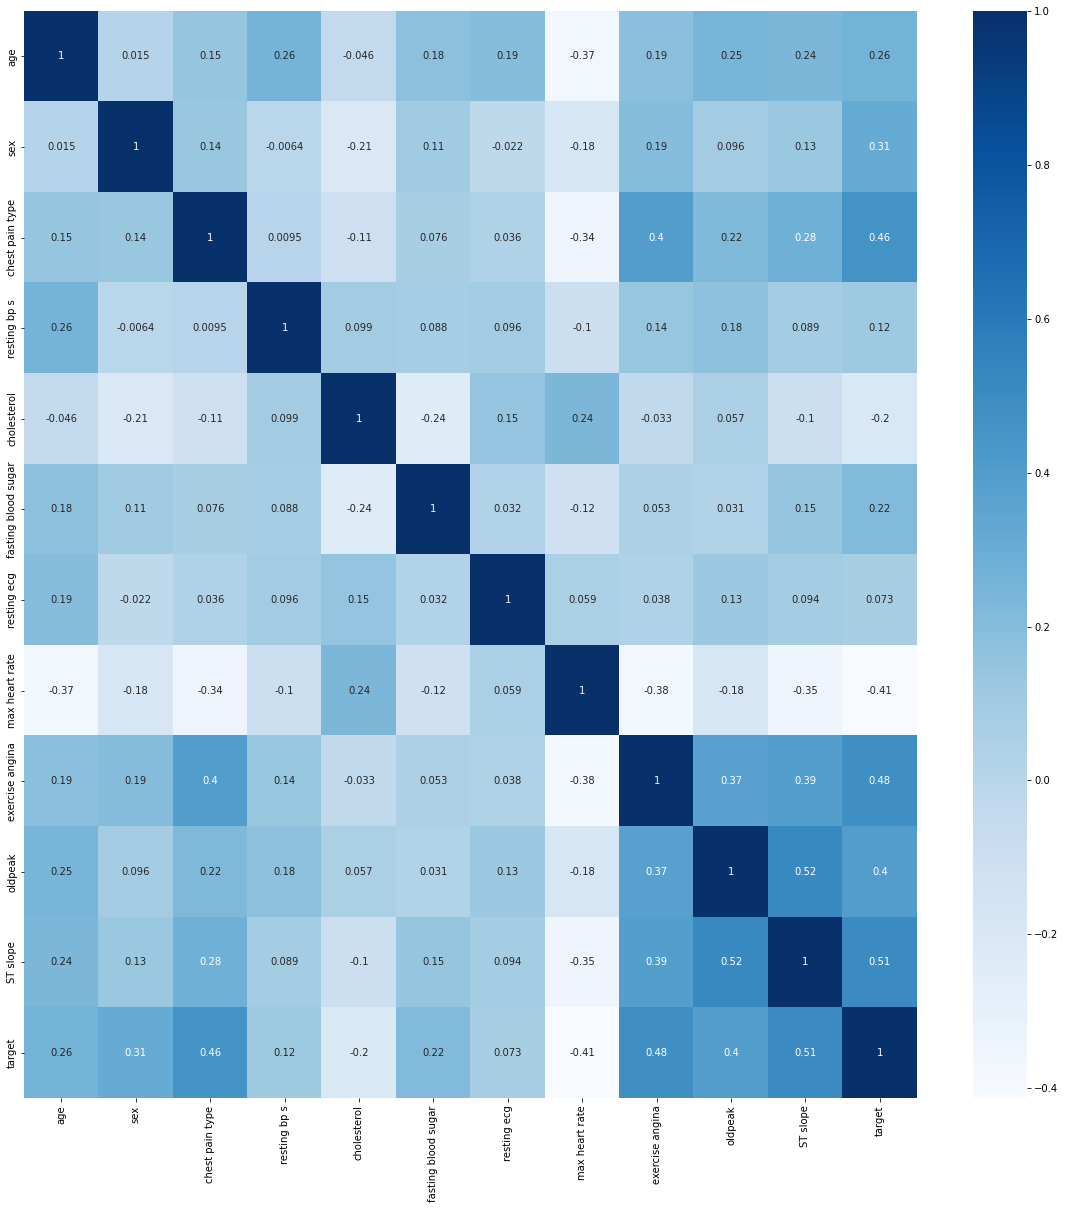

In [11]:
import seaborn as sns
#get correlation of each features in dataset
corrmat = heart_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(heart_data[top_corr_features].corr(),annot=True,cmap="Blues")

<BarContainer object of 14 artists>

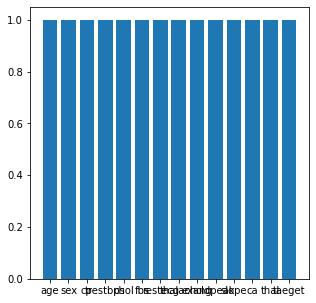

In [12]:
plt.figure(figsize=(5,5))
unique,count=np.unique('target' ,return_counts=True)
plt.bar(CATEGORIES,count)

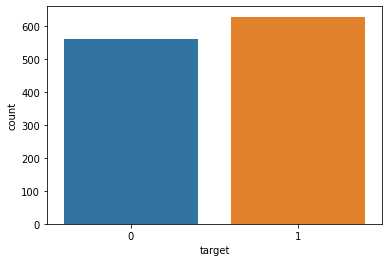

In [13]:
#visualize the count
sns.countplot(heart_data['target'])
#plt.figure(figsize=(12,12))
# f.set_figwidth(16)
# f.set_figheight(16)

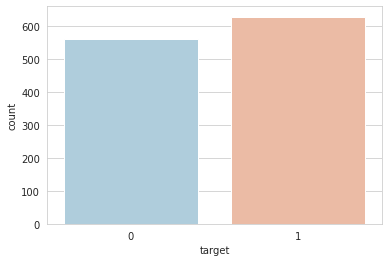

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=heart_data,palette='RdBu_r')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb892e5850>,
      dtype=object)

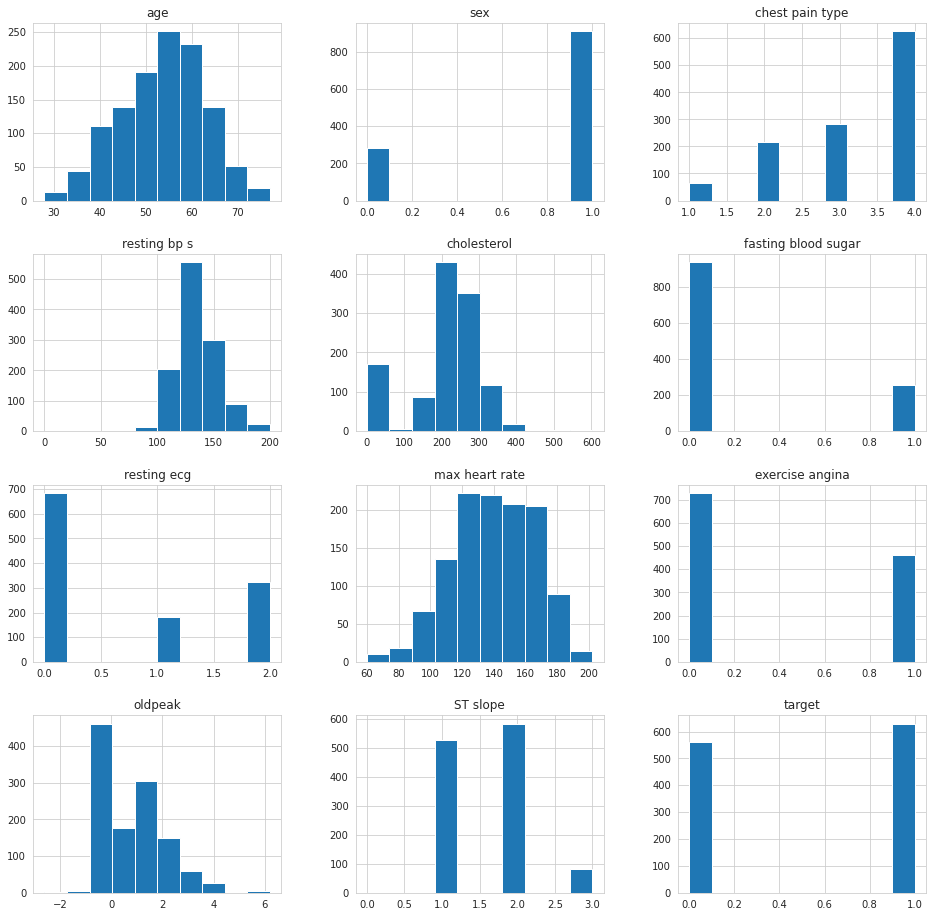

In [15]:
#create histogram for numeric data
heart_data.hist(figsize=(16,16))
#plt = plt.figure(figsize(15,20))
#plt=(figsize=(8,8),facecolor='red',edgecolor='blue')
# plt.figure(figsize=(100,100))
#show plot
# plt.show()

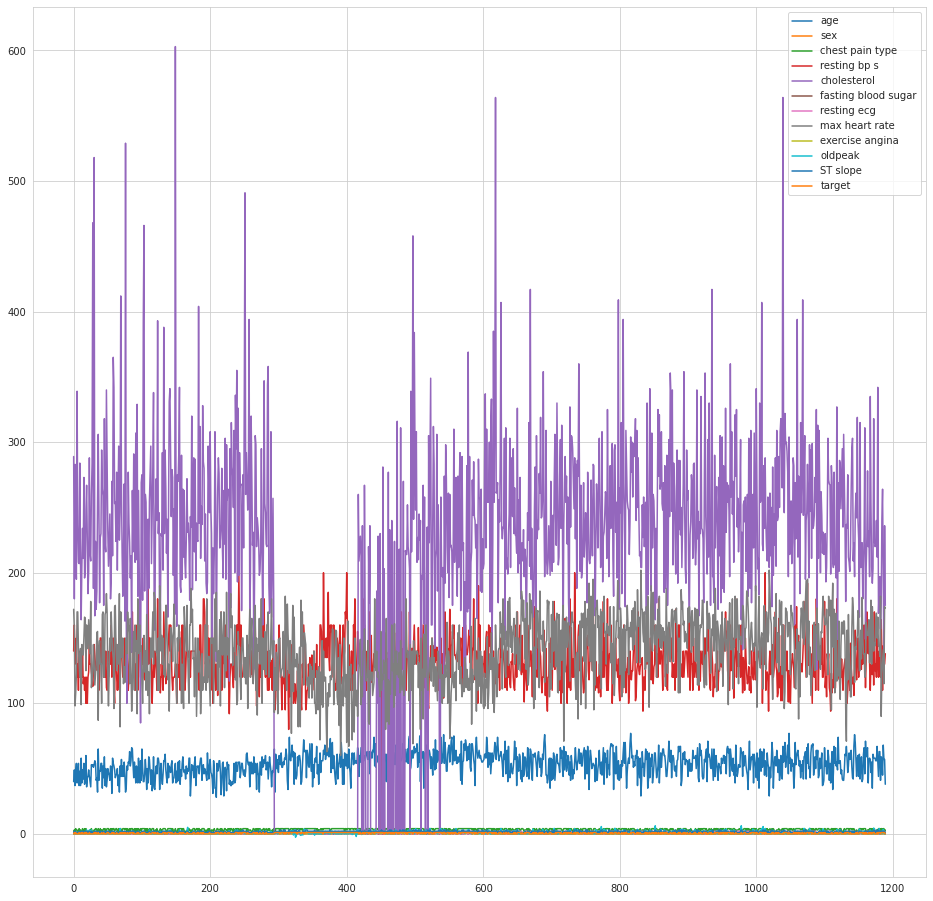

In [16]:
heart_data.plot(figsize=(16,16))

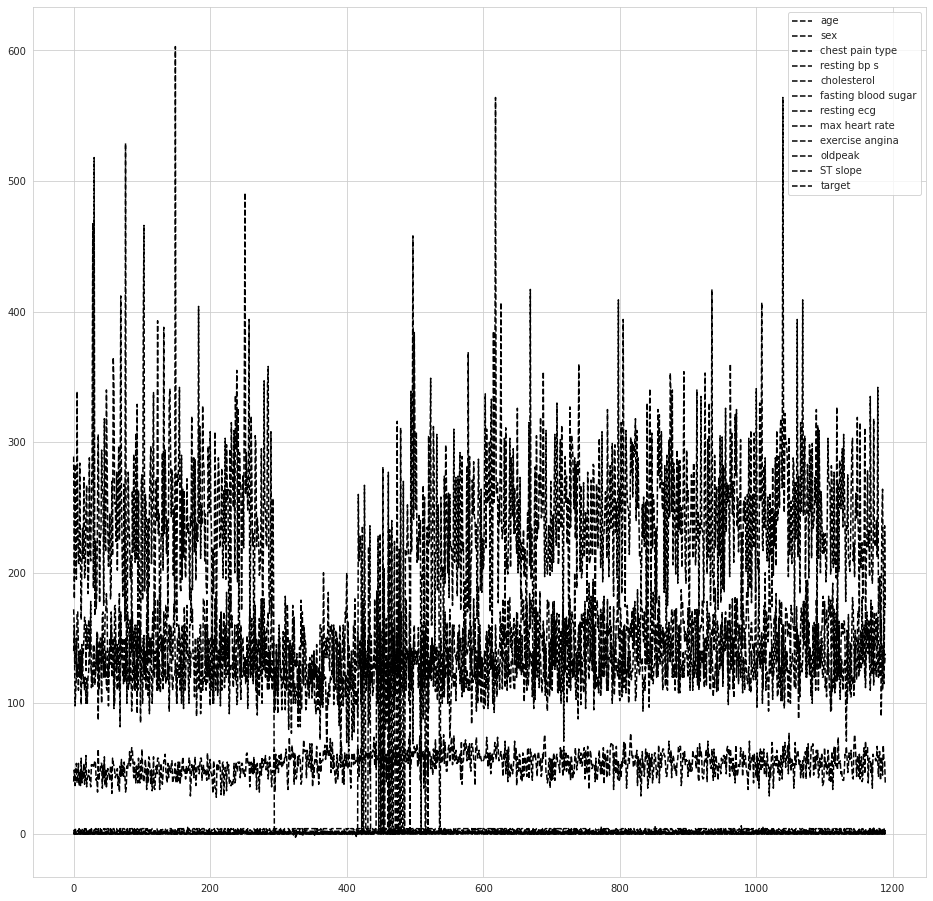

In [17]:
heart_data.plot(style='k--', figsize=(16, 16))


In [18]:
#checking the distribution of target variables
heart_data['target'].value_counts()

1    629
0    561
Name: target, dtype: int64

1 --> Defective heart

0 --> Healthy heart

Spliting the features and target

In [19]:
X = heart_data.drop(columns = 'target', axis = 1)
Y = heart_data['target']

In [20]:
print(X)

      age  sex  chest pain type  ...  exercise angina  oldpeak  ST slope
0      40    1                2  ...                0      0.0         1
1      49    0                3  ...                0      1.0         2
2      37    1                2  ...                0      0.0         1
3      48    0                4  ...                1      1.5         2
4      54    1                3  ...                0      0.0         1
...   ...  ...              ...  ...              ...      ...       ...
1185   45    1                1  ...                0      1.2         2
1186   68    1                4  ...                0      3.4         2
1187   57    1                4  ...                1      1.2         2
1188   57    0                2  ...                0      0.0         2
1189   38    1                3  ...                0      0.0         1

[1190 rows x 11 columns]


In [21]:
print(Y)

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1190, dtype: int64


Spliting the data into Training data and Test data

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [23]:
print(X.shape,X_train.shape,X_test.shape)

(1190, 11) (952, 11) (238, 11)


**Model Training**

**Logistic Regression**

In [24]:
model = LogisticRegression()

In [25]:
#training the LogisticRegression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

**Accuracy Score**

In [26]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [27]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8266806722689075


In [28]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [29]:
print('Accuracy on Test data : ', test_data_accuracy) 

Accuracy on Test data :  0.8109243697478992


**Building a Predictive System**

In [30]:
#age	sex	cp	trestbps	chol	fbs	restecg	thalach	exang	oldpeak	slope	ca	thal

input_data = (48,0,4,138,214,0,0,108,1,1.5,2)

#change the input data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for only on instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has a Heart Disease')

[1]
The Person has a Heart Disease


**Implementation of Naive Bayes Algorithm**

In [31]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
X_train=X_train.astype(int) 
Y_train=Y_train.astype(int)
Y_test=Y_test.astype(int)
X_test=X_test.astype(int) 
#training the model using training set
clf.fit(X_train , Y_train)
#predicting the label using test set on trained Model
prediction = clf.predict(X_test)
#calculating accuracy
acc=accuracy_score(prediction, Y_test)
#accu.append(acc*100)
print("------------------------------------------")
print("Accuracy  : ",acc*100," %")

------------------------------------------
Accuracy  :  81.9327731092437  %


**Implementation of Decision Tree**

In [36]:
accu=[]
prec=[]
Rcal=[]
F_Sco=[]
core=[]
#import tensorflow as tf
from sklearn.tree import DecisionTreeClassifier
X_train=X_train.astype(int)
Y_train=Y_train.astype(int)
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
dct=classifier.fit(X_train,Y_train)

# Predicting the Test set results
Y_test=Y_test.astype(int)
y_pred = dct.predict(X_test)
y_pred=y_pred.astype(int)
acc=accuracy_score(y_pred,Y_test)
accu.append(acc*100)
print("Accuracy  : ",acc*100," %")
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = multilabel_confusion_matrix(Y_test, y_pred)
print(cm)
models.append("Decision Tree Classifier")
core.append(acc*100)
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,fscore,support=score(Y_test,y_pred)
prec.append(precision[1])
Rcal.append(recall[1])
F_Sco.append(fscore[1])
print("--------------------------------------")
print("|Presicion :",(precision[1]*100),"%                 |")
print("|Recall    :",(recall[1]*100),"%     |")
print("|F-Score   :",(fscore[1]*100),"%     |")
print("|Support   :",support[1],"%                   |")
print("--------------------------------------")
#scores.append(acc*100)

Accuracy  :  90.33613445378151  %
[[[115  11]
  [ 12 100]]

 [[100  12]
  [ 11 115]]]
--------------------------------------
|Presicion : 90.5511811023622 %                 |
|Recall    : 91.26984126984127 %     |
|F-Score   : 90.90909090909089 %     |
|Support   : 126 %                   |
--------------------------------------


**Random Forest Classifier**

In [33]:
models=[]
scores=[]

In [34]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix
rfc = RandomForestClassifier(n_estimators=600)
X_train=X_train.astype(int) 
Y_train=Y_train.astype(int) 
rfc.fit(X_train,Y_train)
X_test=X_test.astype(int) 
Y_test=Y_test.astype(int) 
predictions = rfc.predict(X_test)
acc=accuracy_score(predictions, Y_test)
#accu.append(acc*100)
print("Accuracy  : ",acc*100," %")
mat = multilabel_confusion_matrix(Y_test, predictions)
print(mat)

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,fscore,support=score(Y_test, predictions)
#prec.append(precision[1])
#Rcal.append(recall[1])
#F_Sco.append(fscore[1])
print("Presicion :",(precision[1]*100),"%")
print("Recall    :",(recall[1]*100),"%")
print("F-Score   :",(fscore[1]*100),"%")
print("Support   :",support[1])
models.append("Random Forest")
scores.append(acc*100)

Accuracy  :  92.43697478991596  %
[[[118   8]
  [ 10 102]]

 [[102  10]
  [  8 118]]]
Presicion : 92.1875 %
Recall    : 93.65079365079364 %
F-Score   : 92.91338582677166 %
Support   : 126


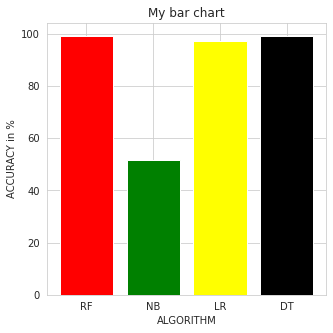

In [38]:
import matplotlib.pyplot as plt
#x-coordinates of left sides of bars
left=[1,2,3,4]
#heights of bars
height=[99.1,51.5,97.06,99.05]
#labels for bars
tick_label=['RF','NB','LR','DT']
#plotting
plt.figure(figsize=(5,5))
# f.set_figwidth(16)
# f.set_figheight(16)
plt.bar(left,height,tick_label=tick_label,width=0.8,color=['red','green','yellow','black'])
#naming x axis
plt.xlabel('ALGORITHM')
#naming y axis
plt.ylabel('ACCURACY in %')  
#plot title
plt.title('My bar chart')
#function to show the plot
plt.show()